<a href="https://colab.research.google.com/github/Esteban0007/Machine_Learning/blob/main/Titanic_ML_Kaggle.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#INTRO

---



#**Titanic - Machine Learning from Disaster (Kaggle)**

The sinking of the Titanic is one of the most infamous shipwrecks in history.

The goal of this Kaggle challenge is to build a predictive model that answers the question: **“What sorts of people were more likely to survive?”** using passenger data.

Kaggle provides us:

*   train.csv
*   test.csv
*   gender_submission


The **training set** should be used to build our machine learning models.


The **test set** should be used to see how well our model performs on unseen data. For the test set, kaggle does not provide the ground truth for each passenger. We are tasked with predicting these outcomes. For each passenger in the test set, we are going to use the model we trained to predict whether or not they survived the sinking of the Titanic.

The **gender_submission.csv** file provides an example of a submission file. It includes a set of predictions assuming all and only female passengers survive.

[Link to Kaggle competition](https://www.kaggle.com/competitions/titanic/overview)







#PLAN OF ACTION

---

1.  Set the data.
2.  Understanding the data
3.   Clean the data.
4.   Divide train-set to test our data.
5.   Create a starting point with a dummy algorithm.
6.   Train different models and metric measure.
7.   Send the submission to Kaggle.




#1. Set the data.

---



First of all we **import** the **dependencies** that we will need to work on data in this project.

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython import get_ipython
from IPython.display import display
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import LabelEncoder, FunctionTransformer
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline


import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


We **set up** the files into **DataFrames**

In [3]:
training = pd.read_csv('https://raw.githubusercontent.com/Esteban0007/Machine_Learning/main/Machine_Learning_Kaggle/Titanic_Files/train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/Esteban0007/Machine_Learning/main/Machine_Learning_Kaggle/Titanic_Files/test.csv')

#2. Understanding the data

---

**Understanding** the data:

Quick look at our data types & null counts.

In [ ]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Understanding of the central tendencies of the data.

In [ ]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Look at numeric and categorical values separately



In [ ]:
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]


**Graphic** all the **numeric values**.

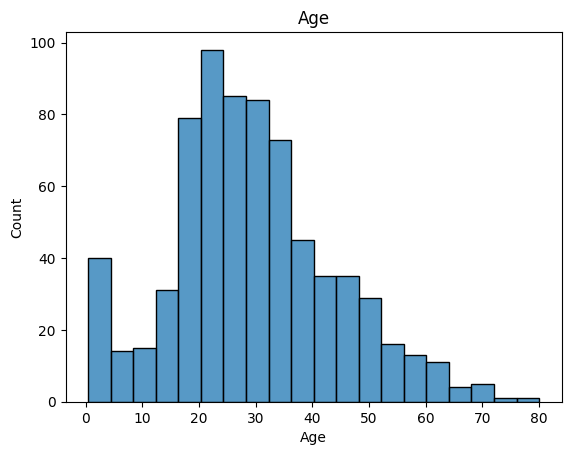

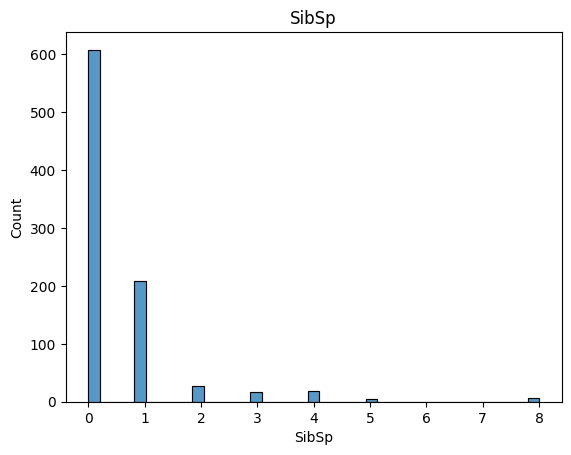

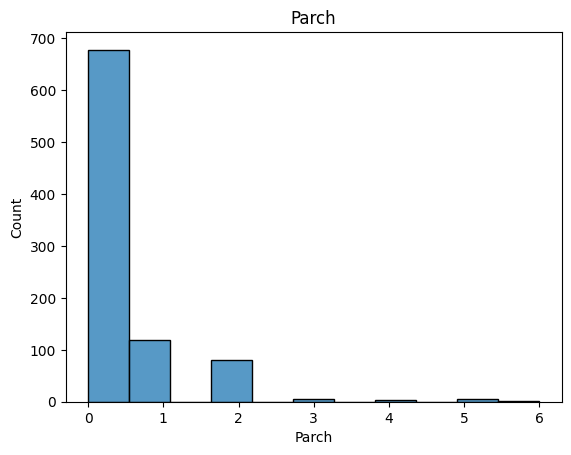

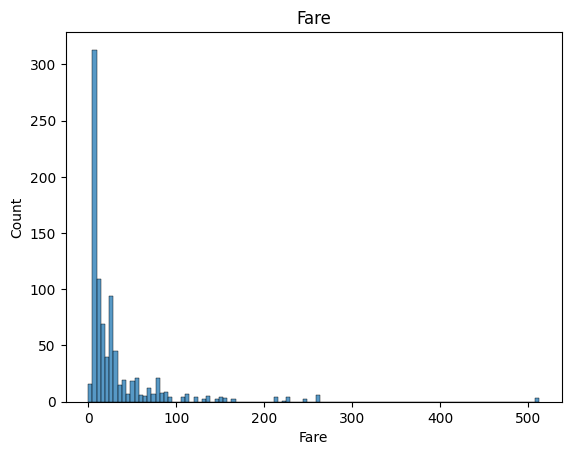

In [ ]:
for i in df_num:
    plt.figure()  # Create a new figure for each histogram
    sns.histplot(data=training, x=i)
    plt.title(i)  # Add a title to each histogram
    plt.show()  # Display each figure separately

**Graphic** all the **categorical values**.

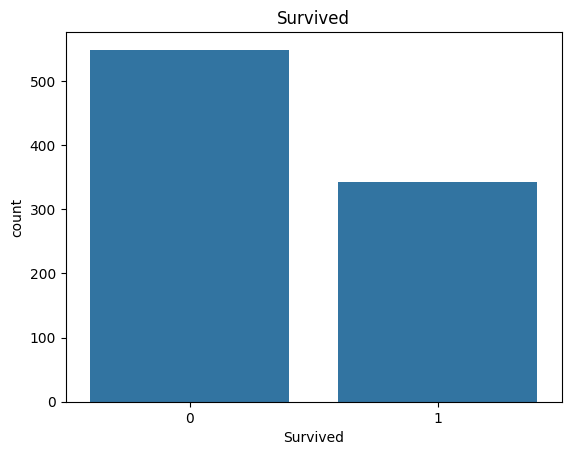

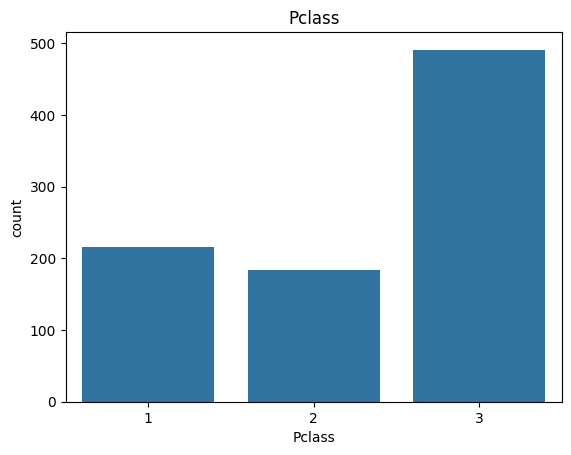

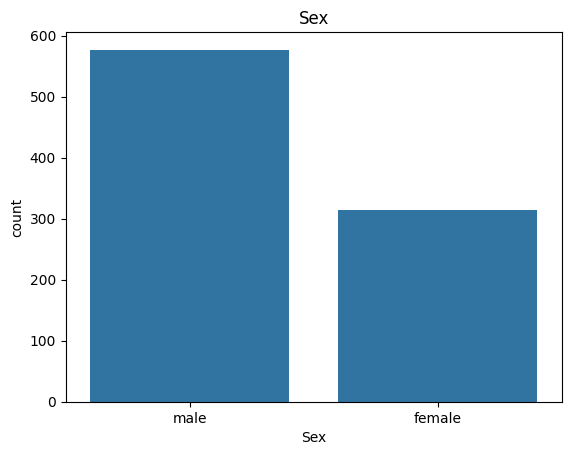

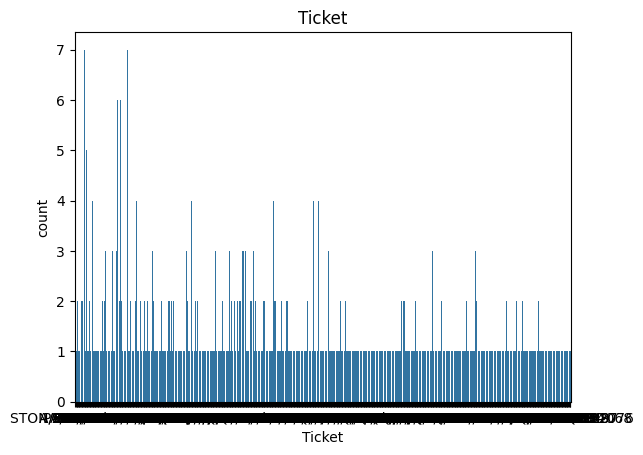

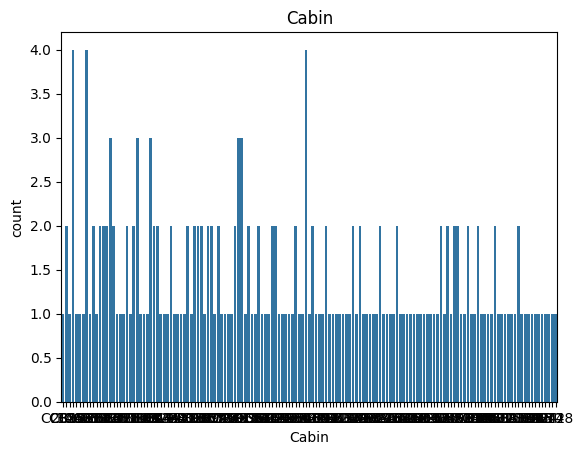

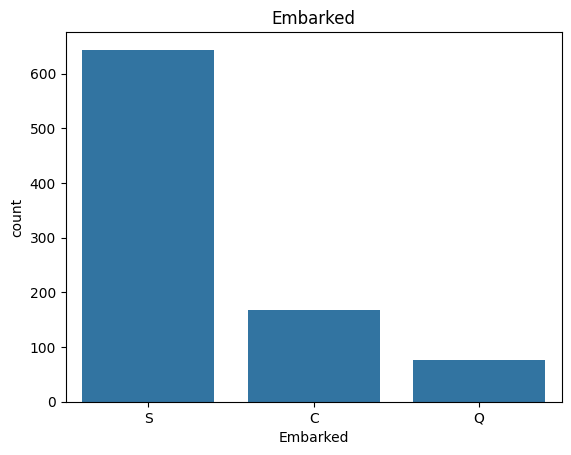

In [ ]:
for i in df_cat:
    plt.figure()  # Create a new figure for each histogram
    sns.countplot(data=training, x=i)
    plt.title(i)  # Add a title to each histogram
    plt.show()  # Display each figure separately

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

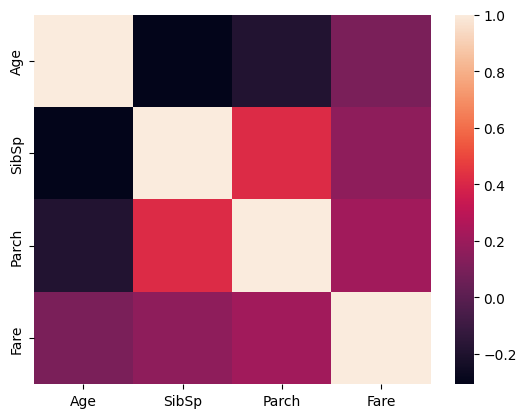

In [ ]:
print(df_num.corr())
sns.heatmap(df_num.corr())


In [ ]:
# Sort the correlation
correlation= df_num.corr()
sorted_corr = correlation.abs().unstack().sort_values(ascending=False)
print(sorted_corr)

Age    Age      1.000000
SibSp  SibSp    1.000000
Parch  Parch    1.000000
Fare   Fare     1.000000
SibSp  Parch    0.414838
Parch  SibSp    0.414838
Age    SibSp    0.308247
SibSp  Age      0.308247
Parch  Fare     0.216225
Fare   Parch    0.216225
Age    Parch    0.189119
Parch  Age      0.189119
SibSp  Fare     0.159651
Fare   SibSp    0.159651
Age    Fare     0.096067
Fare   Age      0.096067
dtype: float64


In [ ]:
# Compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [ ]:
# Comparing survival and each of these categorical variables
print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

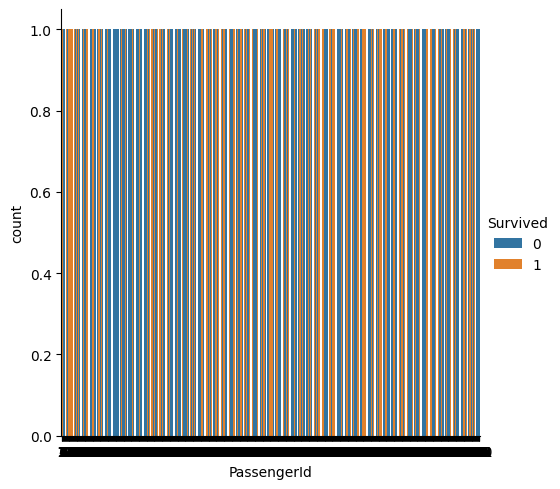

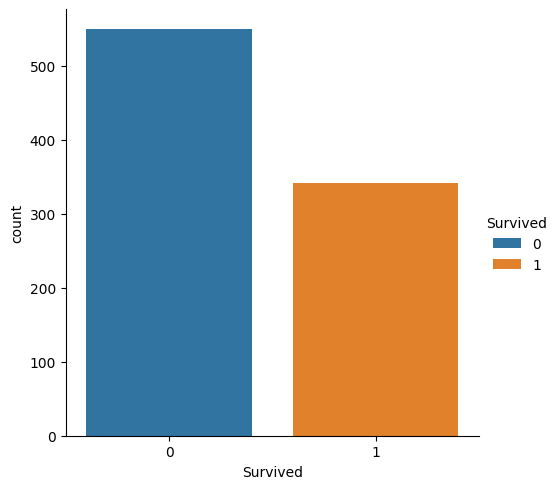

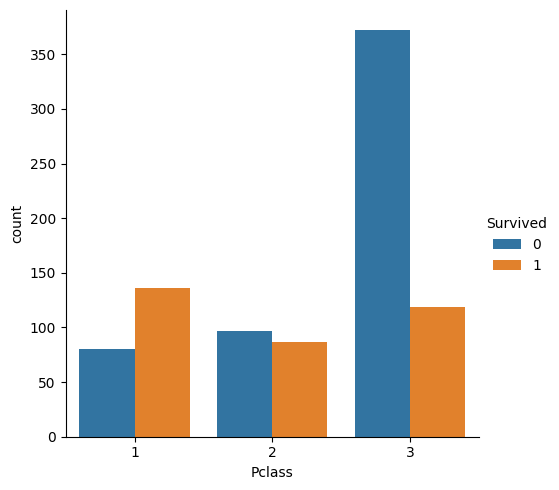

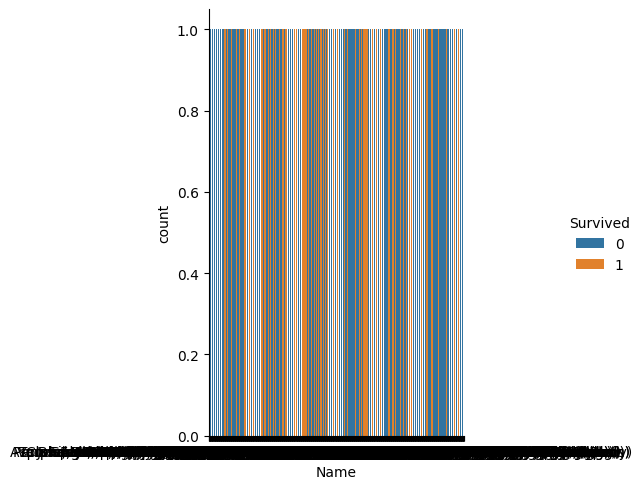

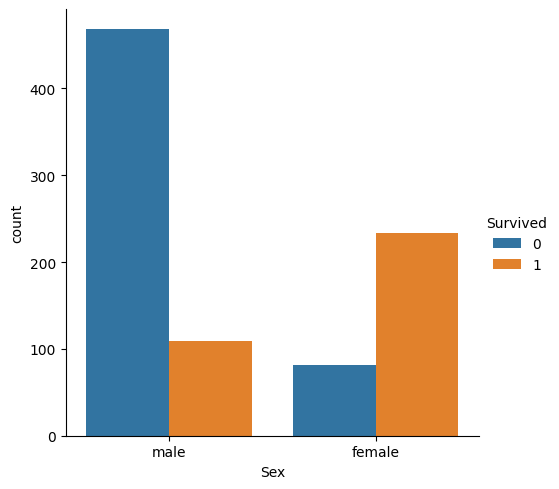

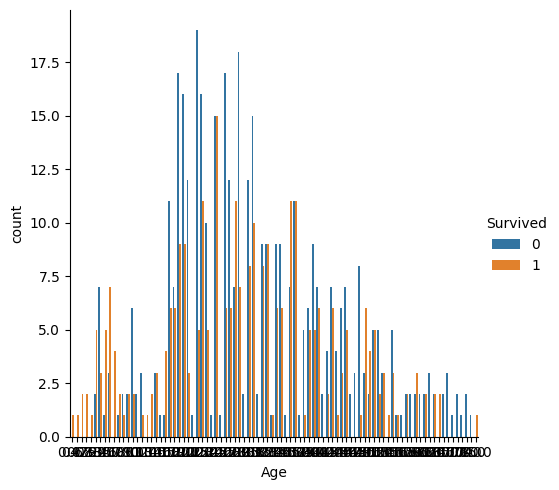

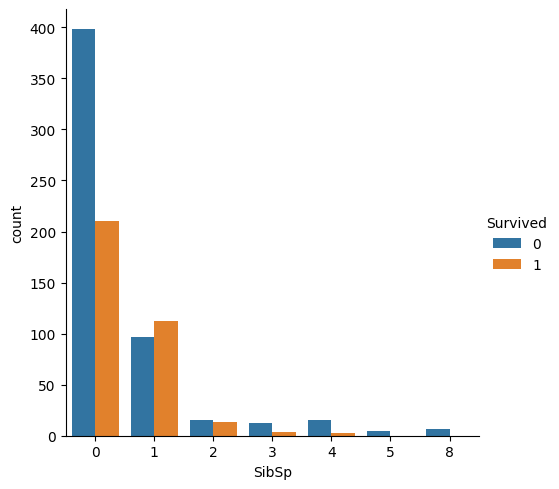

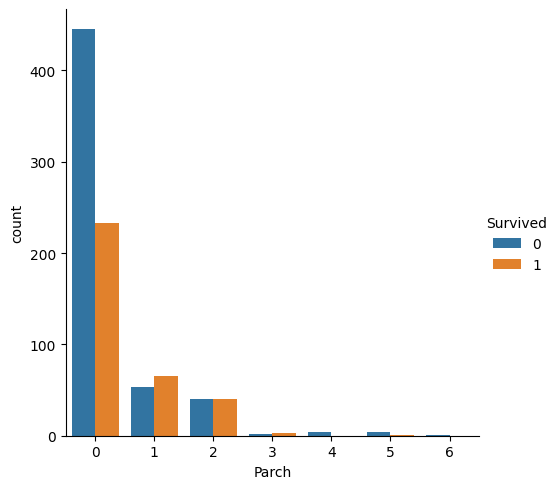

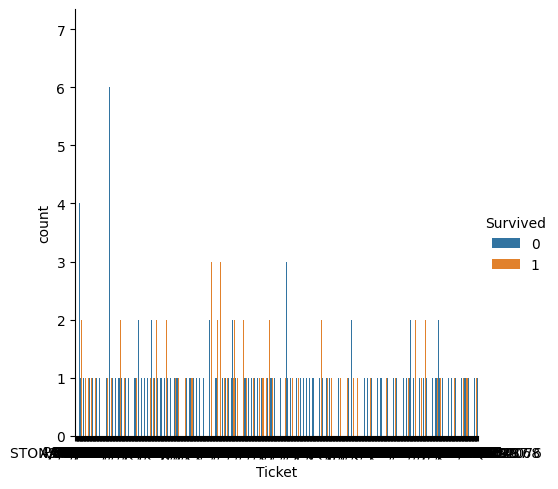

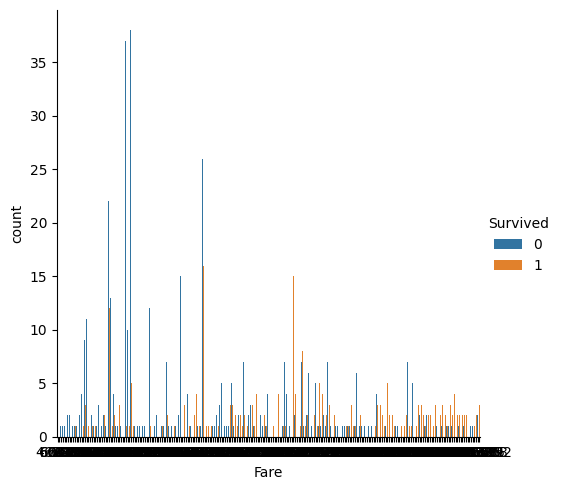

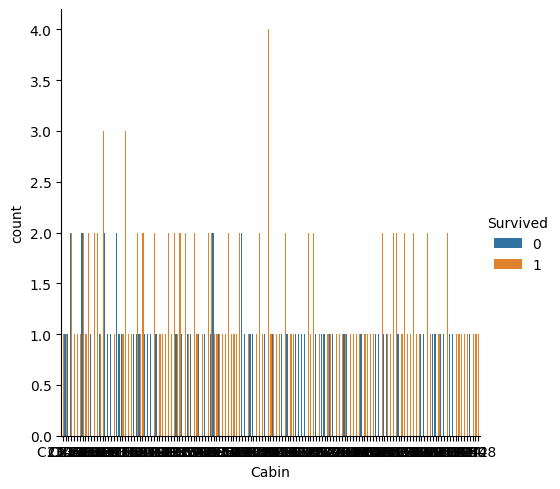

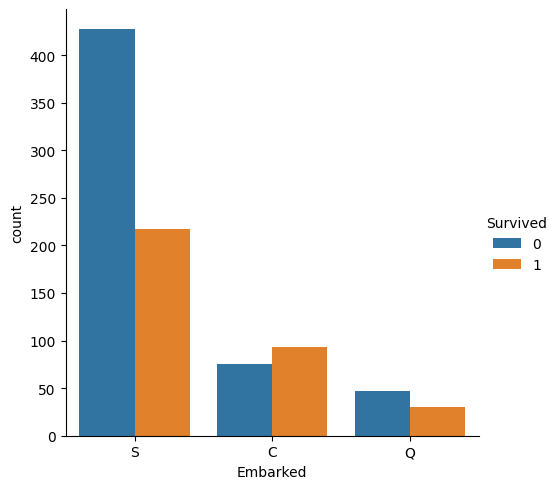

In [ ]:
for i in training.columns:
  sns.catplot(data=training, x=i, hue="Survived", kind="count");

# 3. Clean the data.

---

Find the null **values**.


*   Age.
*   Cabin.
*   Embarked.




In [4]:
print(training.isna().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Fill Na of **Age** using the **median**.

In [5]:
training.loc[:, 'Age'] = training['Age'].fillna(training['Age'].median())

Fill Na of **Embarked** column with the most frequent value (mode)

In [6]:
training.loc[:, 'Embarked'] = training['Embarked'].fillna(training['Embarked'].mode()[0])

The 'Cabin' column has **many missing values**, so:

*   We will create a **new column 'Has_Cabin'** that will indicate if a passenger has a cabin assigned.

*  **Drop the 'Cabin' column** as it has too many null values ​​and is difficult to impute correctly.

In [7]:
training['Has_Cabin'] = training['Cabin'].apply(lambda x: 0 if pd.isna(x) else 1)
training.drop('Cabin', axis=1, inplace=True)

We check that there are no more null values.

In [8]:
print(training.isna().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
Has_Cabin      0
dtype: int64


#4. Divide train-set to test our data.

---

We should divide our training set into a training set and a test set. The reason is that the test set provided by Kaggle does not include the results; it is only for submission purposes.

Lets separate the training data into X (the features) and y (the target variable).

In [9]:
X = training.drop('Survived', axis=1)
y = training['Survived']

Split the dataset into training and test sets.

**test_size=0.2**: This means 20% of the data will be used for testing, and 80% for training.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#5. Create a starting point with a dummy algorithm.

---
 This dummy classifier serves as a baseline for comparison. The goal is to build models that perform better than this simple baseline.

In [15]:
# Create the DummyClassifier using the most frequent strategy
dummy_clf = DummyClassifier(strategy="most_frequent")

# Fit the classifier to the training data
dummy_clf.fit(X_train, y_train)

# Predict on the test set
y_pred = dummy_clf.predict(X_test)

# Evaluate the model's accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.5865921787709497


# 6. Train different models and metric measure.
## DecisionTreeClassifier



Let's use a **DecisionTreeClassifier algorithm** to see to see how it responds.

But first let's do our **own decision tree**. To understand how it works.

## Our own decision Tree

To make a simple example of our **own decision tree** based on the data, we will say that if it is a female, she will survive and if it is a male, he won't.

In [16]:
def prediction(row):
    if row['Sex'] == 'female':
        return 1  # Survived
    else:
        return 0  # Not survived

Evaluate the **accuracy** of simple sex-based prediction

Accuracy on **train-set**:

In [17]:
# Apply the prediction function to the training set (X_train)
X_train['Prediction'] = X_train.apply(prediction, axis=1)

# Calculate the accuracy on the train set.
train_accuracy = accuracy_score(y_train, X_train['Prediction'])
print(f'Sex-based prediction accuracy on training set: {train_accuracy}')


Sex-based prediction accuracy on training set: 0.6235955056179775


Accuracy on **test-set**:

In [18]:
# Apply the prediction function to the test set
test_predictions = X_test.apply(prediction, axis=1)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)
print(f'Sex-based prediction accuracy on test set: {test_accuracy}')

Sex-based prediction accuracy on test set: 0.5865921787709497


## DecisionTreeClassifier.
How the **DecisionTreeClassifier**.

Operation:
1. Find the column that best separates the classes.
2. Use an if on that column to improve the base precision.
3. Repeat the process




First we must take into account that the Decision Tree Classifier has several **parameters** that we can consult [here](https://scikit-learn.org/dev/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

The goal is to find the best parameters.

This is an example of the **difference** between using **entropy** and **gini**:

In [21]:
# Define the model with 'entropy' criterion
clf_entropy = DecisionTreeClassifier(criterion='entropy')

# Define the model with 'gini' criterion
clf_gini = DecisionTreeClassifier(criterion='gini')

# Perform cross-validation with 'entropy'
scores_entropy = cross_val_score(clf_entropy, X, y, cv=5)  # cv=5 specifies 5-fold cross-validation

# Perform cross-validation with 'gini'
scores_gini = cross_val_score(clf_gini, X, y, cv=5)

# Print the average scores for each criterion
print(f"Average accuracy with entropy: {scores_entropy.mean()}")
print(f"Average accuracy with gini: {scores_gini.mean()}")

Average accuracy with entropy: 0.7453957692549118
Average accuracy with gini: 0.7307827506120143


We can do some **cross-validation** to find all the parameters with more accuracy.

In [24]:
# Define the parameter grid
param_grid = {
    'classifier__criterion': ['gini', 'entropy'], # Access parameters of the classifier using '__'
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [1, 2, 3, 5, 10, None]
}

# Create a LabelEncoder for each categorical column
categorical_features = X_train.select_dtypes(include=['object']).columns # Select columns with object dtype
label_encoders = {col: LabelEncoder() for col in categorical_features}

# Create a Pipeline to apply LabelEncoding before DecisionTreeClassifier
pipeline = Pipeline([
    ('preprocessing', ColumnTransformer(
        transformers=[
            ('num', Pipeline([
                ('imputer', SimpleImputer(strategy='mean')),  # Impute missing numerical values with mean
                ('passthrough', 'passthrough')  # Passthrough imputed features
            ]), X_train.select_dtypes(exclude=['object']).columns),
            ('cat', Pipeline([
                ('encode', FunctionTransformer(lambda X: pd.DataFrame({col: LabelEncoder().fit_transform(X[col]) for col in categorical_features if col in X.columns}), validate=False)),# Encode categorical features if they exist in the fold
                ('passthrough', 'passthrough')  # Passthrough encoded features
            ]), categorical_features)
        ],
        remainder='drop'
    )),
    ('classifier', DecisionTreeClassifier())
])


# Create the GridSearchCV object using the Pipeline
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)  # cv=5 for 5-fold cross-validation

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)


# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_


Best parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 3, 'classifier__splitter': 'best'}
Best score: 0.8117797695262483


In [26]:
print(best_model)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('passthrough',
                                                                   'passthrough')]),
                                                  Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'Has_Cabin', 'Prediction'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7fe3244cca60>)),
                                                                  ('passthrough',
                   

In [25]:
# Convert categorical columns to numeric using One-Hot Encoding
X = pd.get_dummies(X)

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the decision tree model
# 'criterion': 'gini', 'max_depth': 10, 'splitter': 'best
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best')

# Training the decision tree
clf.fit(X_train, y_train)

# Making predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate model accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del Árbol de Decisión: {accuracy}')

Precisión del Árbol de Decisión: 0.7541899441340782


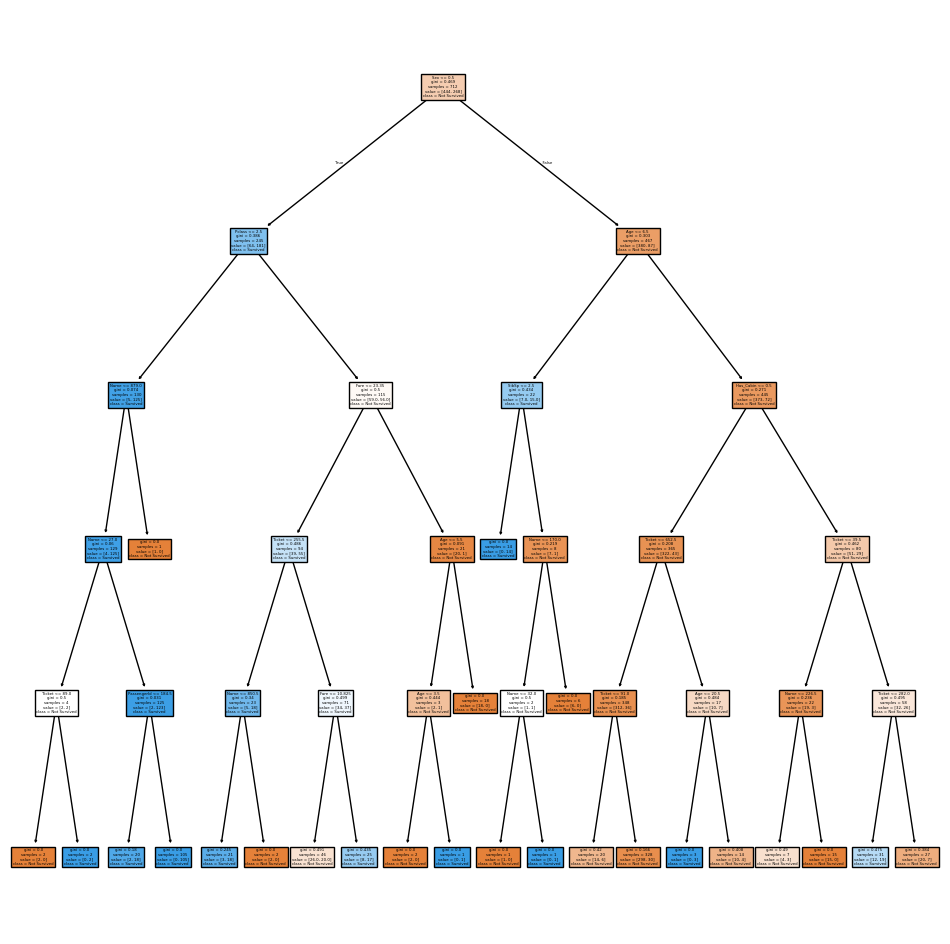

In [27]:
plt.figure(figsize=(12, 12))
plot_tree(clf,
          feature_names=X.columns,
          class_names=['Not Survived', 'Survived'],
          filled=True)
plt.show()

# 7. Send the submission to Kaggle.

1. We retrain the data because it was only train with 80% of 100%.
2. We make a prediction.
3. We create the CSV file (will appear in the collab files).

In [28]:
# Apply One-Hot Encoding to training data
X = pd.get_dummies(X)

# --- Model Training ---
# Train the Decision Tree model using the full training data (after hyperparameter tuning)
clf = DecisionTreeClassifier(criterion='gini', max_depth=5, splitter='best')  # We use the best hyperparameters
clf.fit(X, y)  # Train on the entire training data

# --- Test Data Preprocessing ---
# Apply One-Hot Encoding to test data, ensuring same columns as training data
X_test_kaggle = pd.get_dummies(test)
missing_cols = set(X.columns) - set(X_test_kaggle.columns)
for c in missing_cols:
    X_test_kaggle[c] = 0
X_test_kaggle = X_test_kaggle[X.columns]

# --- Prediction ---
# Make predictions on the Kaggle test data
predictions = clf.predict(X_test_kaggle)

# --- Create Submission File ---
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': predictions})
submission.to_csv('submission.csv', index=False)  # Save to 'submission.csv'
print("Submission file created: submission.csv")

Submission file created: submission.csv
